In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Split Data and DataAnalysis

## 1.1 DataAnalysis via DataDictionary_V1

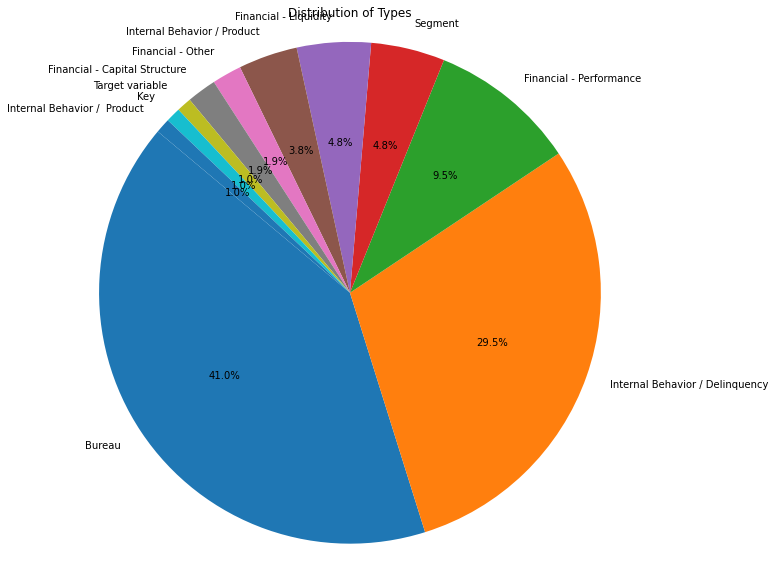

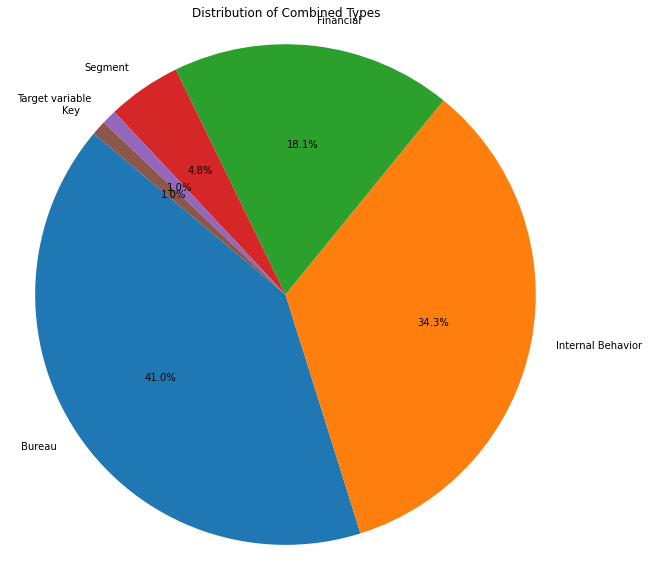

In [2]:
df = pd.read_csv('./dataset/Transformed_data_v1.0_final.csv')
df_dic = pd.read_excel('./dataset/DataDictionary_V1.0_Shared.xlsx')
df_dic.drop(['Unnamed: 0'], axis=1, inplace=True)

def draw_dic_1(df_dic):
    # 计算每个类型的个数
    type_counts = df_dic['Type'].value_counts()

    # 绘制饼图
    plt.figure(figsize=(10, 10))
    plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Types')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # 显示图表
    plt.show()

def draw_dic_2(df):
    # 创建一个新的列，将包含'Internal Behavior'和以'Financial'开头的类别合并
    df['Combined_Type'] = df['Type'].apply(lambda x: 'Internal Behavior' if x.startswith('Internal Behavior') else ('Financial' if x.startswith('Financial') else x))

    # 计算新类别的个数
    combined_type_counts = df['Combined_Type'].value_counts()

    # 绘制饼图
    plt.figure(figsize=(10, 10))
    plt.pie(combined_type_counts, labels=combined_type_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title('Distribution of Combined Types')
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

    # 显示图表
    plt.show()

draw_dic_1(df_dic)
draw_dic_2(df_dic.copy())

**three main modular: Bureau, Internal Behavior, Financial** 

## 1.2 NAN Analysis and fill column with Mean value

In [3]:
len(df.columns[df.isna().sum()>0].to_list())

76

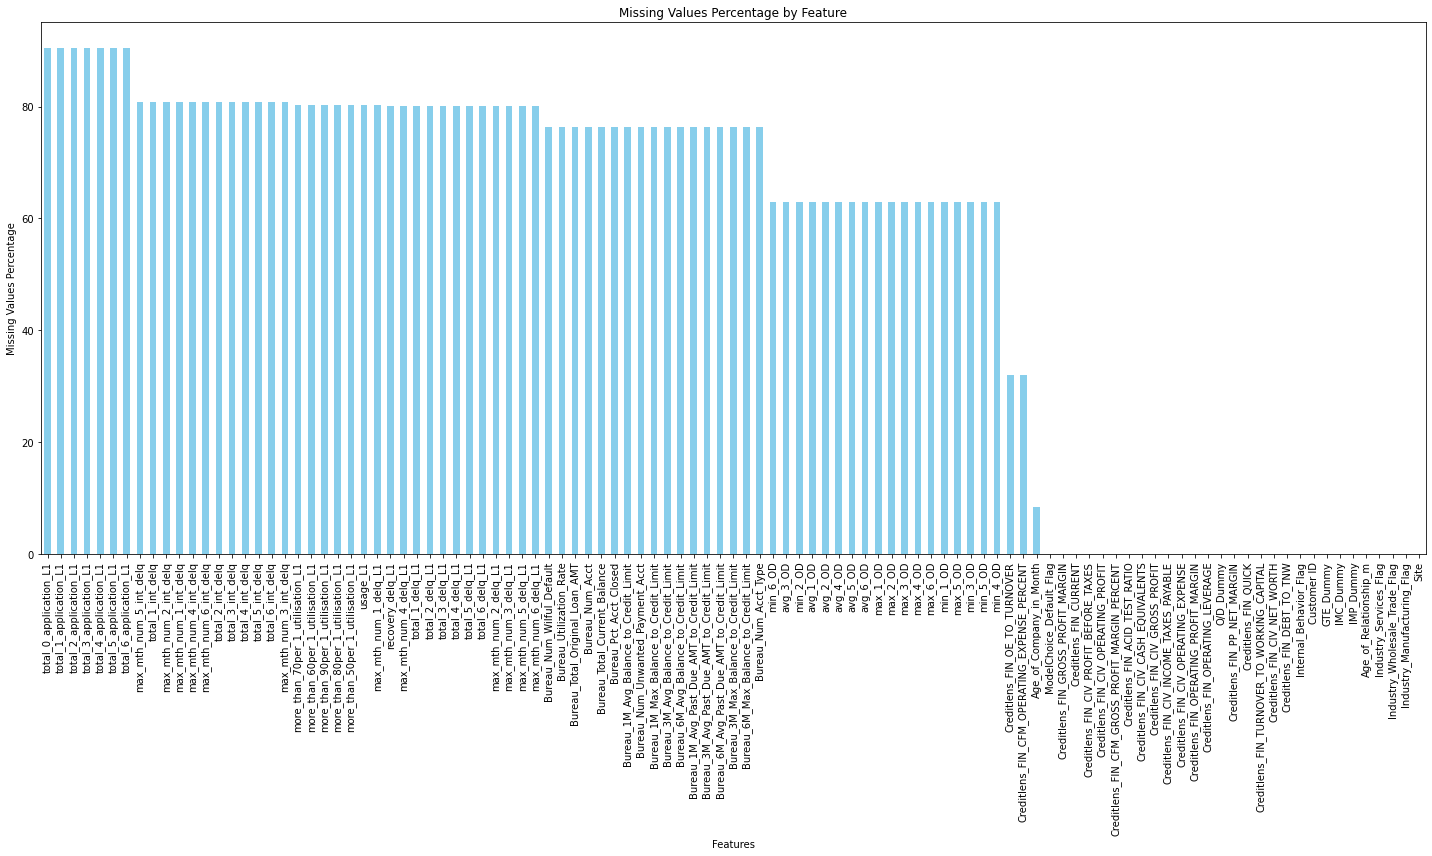

In [4]:
def visualize_missing_values(df, slice_index=None):
    
    # 计算每个特征的缺失值比例
    if slice_index is None:
        missing_values = df.isnull().mean() * 100
    else: 
        missing_values = df.loc[slice_index].isnull().mean() * 100
    
    # 按照缺失值比例从大到小排序
    missing_values = missing_values.sort_values(ascending=False)
    
    # 创建柱状图
    plt.figure(figsize=(20, 12))
    missing_values.plot(kind='bar', color='skyblue')
    
    # 设置图表标题和标签
    plt.title('Missing Values Percentage by Feature')
    plt.xlabel('Features')
    plt.ylabel('Missing Values Percentage')
    
    # 显示图表
    plt.tight_layout()
    plt.show()
    
visualize_missing_values(df)

In [5]:
def find_fields_by_remark(df, remark):
    # 使用条件索引找到Remark列中符合条件的行，并提取对应的Fields列
    fields = df.loc[df['Remark'] == remark, 'Fields'].tolist()
    return fields

In [6]:
df[find_fields_by_remark(df_dic, 'This field is only available for site AA.')]

,Bureau_Num_Acct,Bureau_Num_Acct_Type,Bureau_Pct_Acct_Closed,Bureau_Total_Current_Balance,Bureau_Total_Original_Loan_AMT,Bureau_Utilization_Rate,Bureau_Num_Wilful_Default,Bureau_Num_Unwanted_Payment_Acct,Bureau_1M_Avg_Balance_to_Credit_Limit,Bureau_3M_Avg_Balance_to_Credit_Limit,Bureau_6M_Avg_Balance_to_Credit_Limit,Bureau_1M_Avg_Past_Due_AMT_to_Credit_Limit,Bureau_3M_Avg_Past_Due_AMT_to_Credit_Limit,Bureau_6M_Avg_Past_Due_AMT_to_Credit_Limit,Bureau_1M_Max_Balance_to_Credit_Limit,Bureau_3M_Max_Balance_to_Credit_Limit,Bureau_6M_Max_Balance_to_Credit_Limit
0,60.0,11.0,0.066667,2.616976e+08,1.848826e+09,4.840000e+17,0.0,0.0,0.0,0.0,44.458741,0.0,0.0,0.0,0.0,0.0,141.662056
1,11.0,5.0,0.000000,1.302939e+04,2.562068e+09,3.340000e+13,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
2,3.0,1.0,1.000000,0.000000e+00,1.719676e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
3,4.0,1.0,0.000000,-3.079955e+04,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
4,4.0,1.0,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14206,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14207,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14208,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


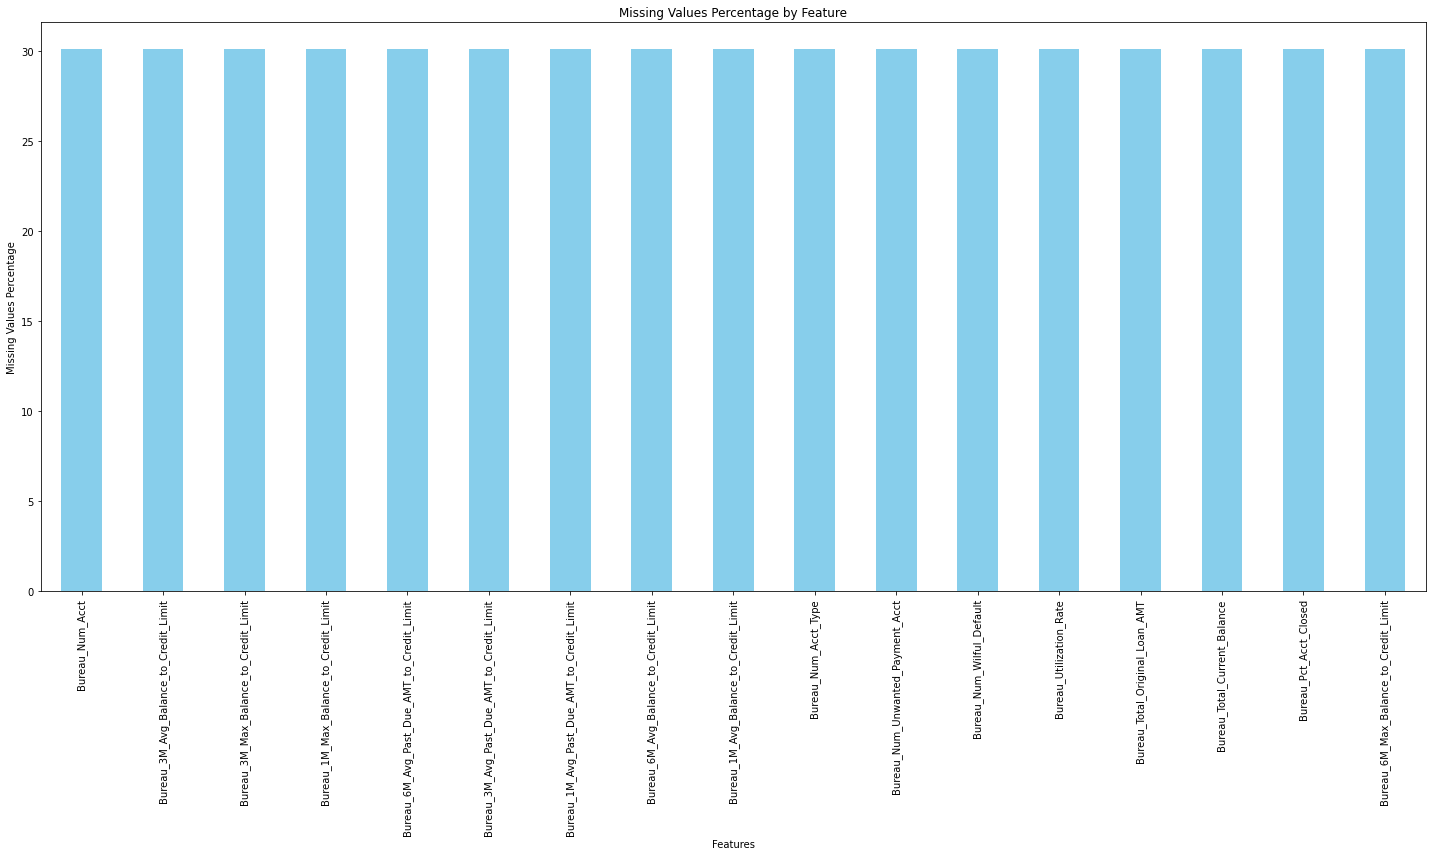

In [7]:
visualize_missing_values(df[find_fields_by_remark(df_dic, 'This field is only available for site AA.')], df[df['Site'] == 'AA'].index)

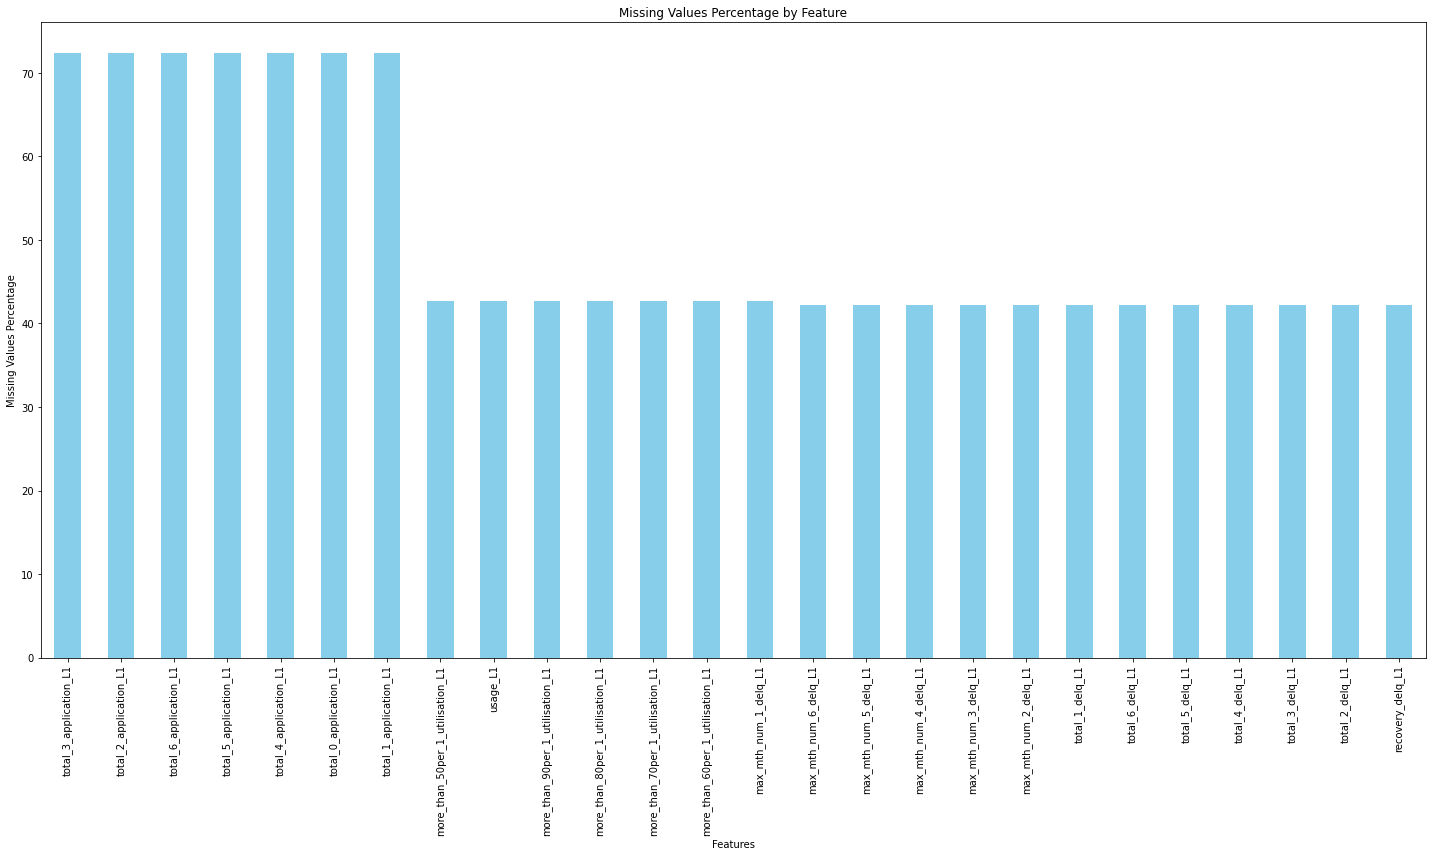

In [8]:
visualize_missing_values(df[find_fields_by_remark(df_dic, 'This field is only available for BB.')], df[df['Site'] == 'BB'].index)

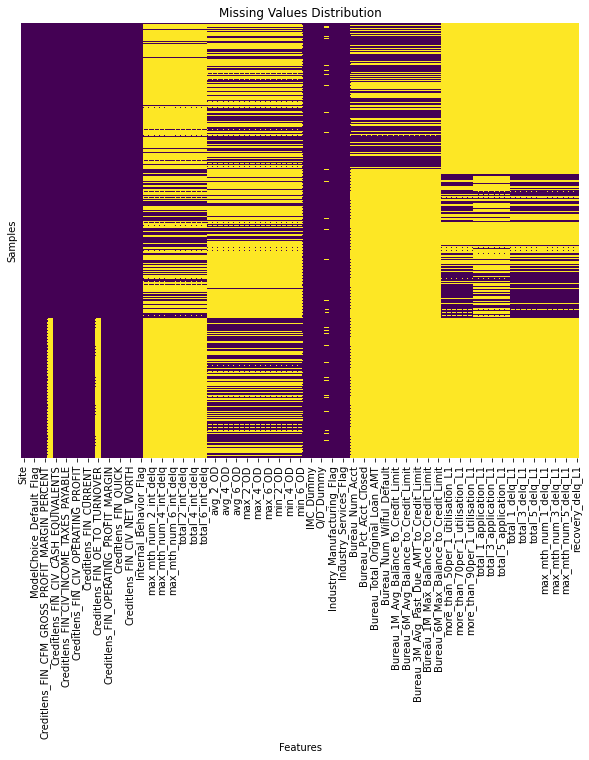

In [9]:
def draw_nan_heatmap(df):
    # 使用 seaborn 的 heatmap() 函数可视化缺失值分布
    plt.figure(figsize=(10, 8))
    sns.heatmap(df.isnull(), cmap='viridis', cbar=False, yticklabels=False)
    plt.title('Missing Values Distribution')
    plt.xlabel('Features')
    plt.ylabel('Samples')
    plt.show()
draw_nan_heatmap(df)

Segment are important when we split the training and test dataset. There are **four segment types including Age_of_Company_in_Month, Industry_Manufacturing_Flag, Industry_Wholesale_Trade_Flag, Industry_Services_Flag.** Among which Age_of_Company_in_Month has some nan and i consider to use mean to replace it after spliting the dataset.

In [10]:
df[df_dic[df_dic['Type'] == 'Segment']['Fields'].values].describe()

,Age_of_Company_in_Month,Industry_Manufacturing_Flag,Industry_Wholesale_Trade_Flag,Industry_Services_Flag
count,13014.000000,14211.00000,14211.000000,14211.000000
mean,255.192792,0.29632,0.280346,0.224193
std,166.795633,0.45665,0.449184,0.417064
min,4.000000,0.00000,0.000000,0.000000
25%,131.000000,0.00000,0.000000,0.000000
50%,219.000000,0.00000,0.000000,0.000000
75%,343.000000,1.00000,1.000000,0.000000
max,1617.000000,1.00000,1.000000,1.000000


In [11]:
df['Site'].value_counts()

Site
BB    4875
AA    4795
VV    4541
Name: count, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
# split the dataset based on target y
df_train, df_test = train_test_split(df.copy(), test_size=0.2, stratify=df[['ModelChoice_Default_Flag']], random_state=42)

# df_train and df_test need to be reset_index
df_train.reset_index(drop=True, inplace=True)
df_test.reset_index(drop=True, inplace=True)

# Fill Age_of_Company_in_Month with mean value
def fill_nan_ByMean(df_train, df_test, column):
    mean_value = df_train[column].mean()  # 使用 df_train 计算均值
    df_train[column].fillna(mean_value, inplace=True)
    df_test[column].fillna(mean_value, inplace=True)

def fill_missing_with_train_mean(df_train, df_test):
    # 仅对数值类型的特征计算均值
    numeric_columns = df_train.select_dtypes(include='number').columns
    train_means = df_train[numeric_columns].mean()
    
    # 使用训练集的均值填充训练集和测试集的数值类型特征的缺失值
    df_train_filled = df_train.copy()
    df_test_filled = df_test.copy()
    
    df_train_filled[numeric_columns] = df_train[numeric_columns].fillna(train_means)
    df_test_filled[numeric_columns] = df_test[numeric_columns].fillna(train_means)
    
    return df_train_filled, df_test_filled

    
# fill_nan_ByMean(df_train, df_test, 'Age_of_Company_in_Month')
df_train, df_test = fill_missing_with_train_mean(df_train, df_test)

In [13]:
df_train[df_dic[df_dic['Type'] == 'Segment']['Fields'].values].describe()

,Age_of_Company_in_Month,Industry_Manufacturing_Flag,Industry_Wholesale_Trade_Flag,Industry_Services_Flag
count,11368.000000,11368.000000,11368.000000,11368.000000
mean,254.333493,0.296886,0.281668,0.221851
std,158.260683,0.456906,0.449832,0.415510
min,4.000000,0.000000,0.000000,0.000000
25%,138.000000,0.000000,0.000000,0.000000
50%,240.000000,0.000000,0.000000,0.000000
75%,328.000000,1.000000,1.000000,0.000000
max,1617.000000,1.000000,1.000000,1.000000


In [14]:
X_train, y_train = df_train.drop(columns=['ModelChoice_Default_Flag']).values, df_train['ModelChoice_Default_Flag'].values
X_test, y_test = df_test.drop(columns=['ModelChoice_Default_Flag']).values, df_test['ModelChoice_Default_Flag'].values

## 1.3 Sample Imbalance and Upsampling

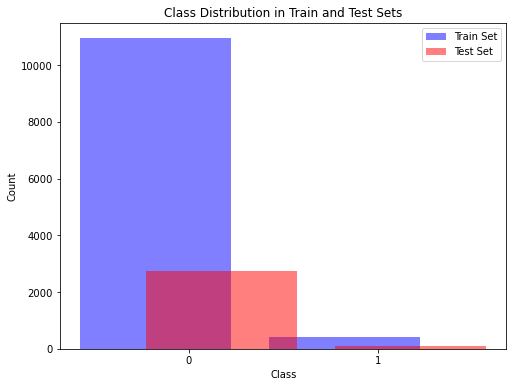

In [15]:
def draw_imbalance(df_train, df_test):
    # 统计训练集和测试集中目标变量的类别分布
    train_counts = df_train['ModelChoice_Default_Flag'].value_counts()
    test_counts = df_test['ModelChoice_Default_Flag'].value_counts()

    # 创建柱状图
    plt.figure(figsize=(8, 6))
    plt.bar(train_counts.index, train_counts.values, alpha=0.5, color='b', label='Train Set')
    plt.bar(test_counts.index + 0.35, test_counts.values, alpha=0.5, color='r', label='Test Set')
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.title('Class Distribution in Train and Test Sets')
    plt.xticks([0.175, 1.175], ['0', '1'])  # 设置x轴刻度
    plt.legend()
    plt.show()

draw_imbalance(df_train, df_test)

In [16]:
from imblearn.over_sampling import RandomOverSampler
import pandas as pd

def resample_data(df, target_column):
    """
    Oversample the imbalanced data in the DataFrame.
    
    Parameters:
    df (pd.DataFrame): The DataFrame containing the data.
    target_column (str): The name of the target column, i.e., the one with labels.
    
    Returns:
    resampled_df (pd.DataFrame): The DataFrame after oversampling.
    """
    # Separate features and target
    X = df.drop(target_column, axis=1)  # Features
    y = df[target_column]  # Target

    # Create an oversampling object
    ros = RandomOverSampler(random_state=42)

    # Apply oversampling
    X_resampled, y_resampled = ros.fit_resample(X, y)

    # Create a DataFrame for the resampled data
    df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

    # Return the resampled DataFrame
    return df_resampled

df_train = resample_data(df_train, 'ModelChoice_Default_Flag')

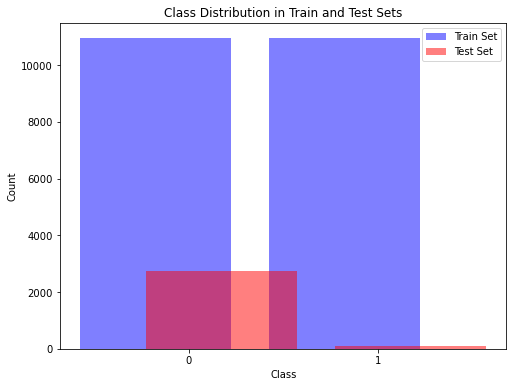

In [17]:
draw_imbalance(df_train, df_test)

**Use Gini and recall etc. as Evaluation indexes instead of accuracy**

## 1.4 find columns which are not float type and drop CustomerID

In [18]:
df_train.dtypes

Site                                               object
Customer ID                                         int64
Creditlens_FIN_ACID_TEST_RATIO                    float64
Creditlens_FIN_CFM_GROSS_PROFIT_MARGIN_PERCENT    float64
Creditlens_FIN_CFM_OPERATING_EXPENSE_PERCENT      float64
                                                   ...   
max_mth_num_4_delq_L1                             float64
max_mth_num_5_delq_L1                             float64
max_mth_num_6_delq_L1                             float64
recovery_delq_L1                                  float64
ModelChoice_Default_Flag                            int64
Length: 105, dtype: object

In [19]:
df_train.drop(columns=['Customer ID'], inplace=True)
df_test.drop(columns=['Customer ID'], inplace=True)

# 2. BenchMark Model--LightGBM

In [20]:
X_train, y_train = df_train.drop(columns=['ModelChoice_Default_Flag']).values, df_train['ModelChoice_Default_Flag'].values
X_test, y_test = df_test.drop(columns=['ModelChoice_Default_Flag']).values, df_test['ModelChoice_Default_Flag'].values

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, accuracy_score, recall_score, precision_score, f1_score
from sklearn.metrics import roc_curve, auc

def draw_roc(y_true, y_pred):
    # 计算 ROC 曲线的参数
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    # 绘制 ROC 曲线图
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()
    
def evaluate_predictions(y_true, y_pred, prosibilities):
    # 计算其他指标
    auc_score = roc_auc_score(y_true, prosibilities)
    accuracy = accuracy_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    
    # 输出结果
    print("AUC:", auc_score)
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

    # 返回指标
    return auc_score, accuracy, recall, precision, f1

## 2.1 Logistic BenchMark

In [27]:
import lightgbm as lgb
from sklearn.model_selection import cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler

def bench_mark(pipe_lgb, X_train, y_train, X_test, y_test):

    # 定义交叉验证策略
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # 进行五折交叉验证
    scores = cross_val_score(pipe_lgb, X_train, y_train, cv=kfold, scoring='roc_auc')

    # 输出交叉验证结果
    print("Five-fold cross-validation AUC: ", scores)
    print("Average AUC: ", scores.mean())
    
    # 使用所有的训练数据来训练一个模型
    pipe_lgb.fit(X_train, y_train)

    # 对新的测试数据集进行预测
    probabilities = pipe_lgb.predict_proba(X_test)[:, 1]
    final_test_predictions = (probabilities > 0.5).astype(int)
    # 计算新的测试数据集上的 AUC
    final_test_auc = roc_auc_score(y_test, probabilities)
    print("After training using the entire training set, the AUC on the test data set: ", final_test_auc)
    report = classification_report(y_test, final_test_predictions)
    print(report)
    evaluate_predictions(y_test, final_test_predictions, probabilities)
    draw_roc(y_test, probabilities)
    

C:\Users\11642\AppData\Roaming\Python\Python38\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Five-fold cross-validation AUC:  [0.73199721 0.71859794 0.72575541 0.72562919 0.7188632 ]
Average AUC:  0.7241685889734559
After training using the entire training set, the AUC on the test data set:  0.6797959039047552
              precision    recall  f1-score   support

           0       0.98      0.74      0.84      2740
           1       0.07      0.52      0.13       103

    accuracy                           0.74      2843
   macro avg       0.52      0.63      0.49      2843
weighted avg       0.94      0.74      0.82      2843

AUC: 0.6797959039047552
Accuracy: 0.7358424199788955
Recall: 0.5242718446601942
Precision: 0.07142857142857142
F1 Score: 0.12572759022118743


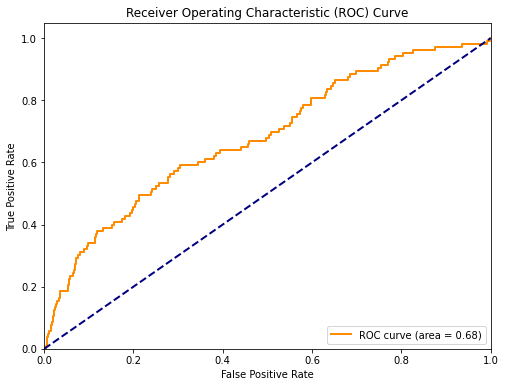

In [32]:
from sklearn.linear_model import LogisticRegression

# 使用逻辑回归模型
lr = LogisticRegression(penalty='l2', C=1, solver='liblinear', 
                            multi_class='ovr', random_state=0)

# 使用管道包装逻辑回归模型
pipe_lr = Pipeline([('scaler', StandardScaler()), ('lr', lr)])

# 调用 benchmark 函数
bench_mark(pipe_lr, X_train[:, 1:], y_train, X_test[:, 1:], y_test)

## 2.2 LGB Benchmark drop Site

Five-fold cross-validation AUC:  [0.99743902 0.9970387  0.99751784 0.99761978 0.99791677]
Average AUC:  0.9975064224358808
After training using the entire training set, the AUC on the test data set:  0.7440684572319467
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2740
           1       0.18      0.29      0.22       103

    accuracy                           0.93      2843
   macro avg       0.58      0.62      0.59      2843
weighted avg       0.94      0.93      0.93      2843

AUC: 0.7440684572319467
Accuracy: 0.9257826239887443
Recall: 0.2912621359223301
Precision: 0.17857142857142858
F1 Score: 0.2214022140221402


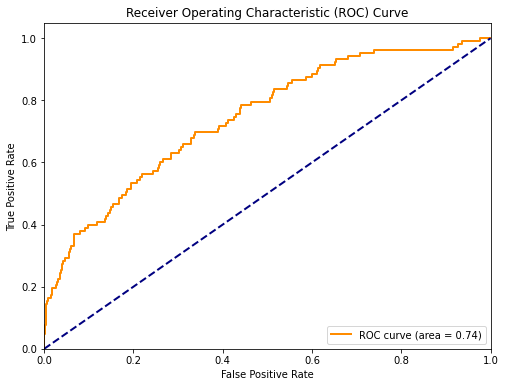

In [23]:
# 创建一个 Pipeline
pipe_lgb = Pipeline([
    ('clf', lgb.LGBMClassifier(random_state=1, n_estimators=100, n_jobs=6))  # LightGBM 分类器
])
bench_mark(pipe_lgb, X_train[:, 1:], y_train, X_test[:, 1:], y_test)

## 2.3 LGB Benchmark One hot Encoder Site

Five-fold cross-validation AUC:  [0.99658106 0.99713454 0.99735449 0.99734878 0.99778334]
Average AUC:  0.99724043913603
After training using the entire training set, the AUC on the test data set:  0.7713273332860888
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      2740
           1       0.20      0.30      0.24       103

    accuracy                           0.93      2843
   macro avg       0.59      0.63      0.60      2843
weighted avg       0.95      0.93      0.94      2843

AUC: 0.7713273332860888
Accuracy: 0.9310587407667956
Recall: 0.30097087378640774
Precision: 0.2
F1 Score: 0.24031007751937983


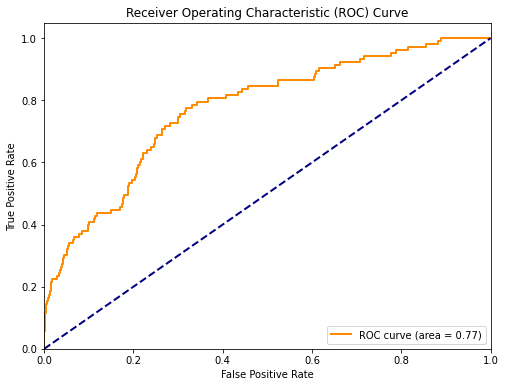

In [24]:
df_train_encoder = pd.get_dummies(df_train)
df_test_encoder = pd.get_dummies(df_test)
X_train_encoder = df_train_encoder.drop(columns=['ModelChoice_Default_Flag']).values
X_test_encoder = df_test_encoder.drop(columns=['ModelChoice_Default_Flag']).values
bench_mark(pipe_lgb, X_train_encoder, y_train, X_test_encoder, y_test)

## 2.3 Parameter Optimization via Optuna

[I 2024-04-19 00:39:03,179] A new study created in memory with name: no-name-1ccccc5b-a48a-4da4-b79d-bc8bf95cb993
[I 2024-04-19 00:39:13,439] Trial 0 finished with value: 0.9986995159928508 and parameters: {'num_leaves': 40, 'learning_rate': 0.04790577931426845, 'max_depth': 5, 'n_estimators': 901}. Best is trial 0 with value: 0.9986995159928508.
[I 2024-04-19 00:39:17,907] Trial 1 finished with value: 0.8837026855144698 and parameters: {'num_leaves': 10, 'learning_rate': 0.013828247299691478, 'max_depth': 4, 'n_estimators': 457}. Best is trial 0 with value: 0.9986995159928508.
[I 2024-04-19 00:39:25,262] Trial 2 finished with value: 0.8886173728163669 and parameters: {'num_leaves': 132, 'learning_rate': 0.00038525660490929805, 'max_depth': 8, 'n_estimators': 165}. Best is trial 0 with value: 0.9986995159928508.
[I 2024-04-19 00:39:28,408] Trial 3 finished with value: 0.9926783256258151 and parameters: {'num_leaves': 156, 'learning_rate': 0.07825301986744225, 'max_depth': 7, 'n_estimat

AUC: 0.7309864644603501
Accuracy: 0.9662328526204713
Recall: 0.14563106796116504
Precision: 0.6521739130434783
F1 Score: 0.2380952380952381


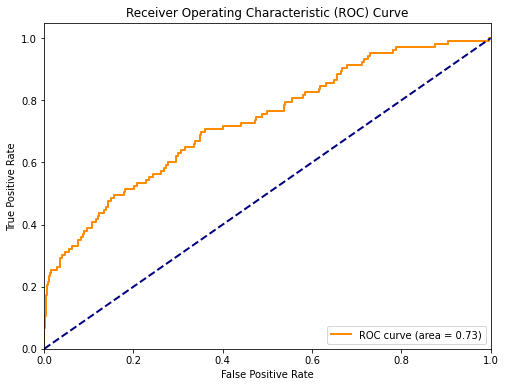

Best params: {'num_leaves': 151, 'learning_rate': 0.04953824530034172, 'max_depth': 9, 'n_estimators': 713}
Test AUC: 0.7309864644603501


In [77]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
from lightgbm.sklearn import LGBMClassifier
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


def optimize_lgb(X_train, y_train, X_test, y_test, n_trials=100):
    """
    使用 Optuna 对 LightGBM 模型进行超参数优化，并在测试集上评估性能。

    参数:
        X_train (numpy.ndarray): 训练集特征数据
        y_train (numpy.ndarray): 训练集标签数据
        X_test (numpy.ndarray): 测试集特征数据
        y_test (numpy.ndarray): 测试集标签数据
        n_trials (int): 超参数优化的迭代次数，默认为100

    返回:
        dict: 最佳超参数
        float: 测试集的 AUC 分数
    """
    def objective(trial):
        params = {
            'objective': 'binary',
            'metric': 'auc',
            'verbosity': -1,
            'num_leaves': trial.suggest_int('num_leaves', 10, 200),
            'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.1),
            'max_depth': trial.suggest_int('max_depth', 3, 10),
            'n_estimators': trial.suggest_int('n_estimators', 10, 1000),
            'n_jobs': 6
        }

        skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
        scores = []
        for train_index, val_index in skf.split(X_train, y_train):
            X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
            y_train_fold, y_val_fold = y_train[train_index], y_train[val_index]

            model = LGBMClassifier(**params)
            model.fit(X_train_fold, y_train_fold)
            y_pred_val_proba = model.predict_proba(X_val_fold)[:, 1]
            score = roc_auc_score(y_val_fold, y_pred_val_proba)
            scores.append(score)

        return np.mean(scores)

    # Define optimization study
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)

    # Get best parameters
    best_params = study.best_params

    # Train LGBM model with best parameters on full training data
    best_model = LGBMClassifier(**best_params)
    best_model.fit(X_train, y_train)

    # Evaluate model on test set
    y_pred_test_proba = best_model.predict_proba(X_test)[:, 1]
    auc_test = roc_auc_score(y_test, y_pred_test_proba)

    # Evaluate model on test set
    y_pred_test = (y_pred_test_proba > 0.5).astype(int)
    evaluate_predictions(y_test, y_pred_test, y_pred_test_proba)
    draw_roc(y_test, y_pred_test_proba)
    return best_params, auc_test

# 使用示例
best_params, test_auc = optimize_lgb(X_train_encoder, y_train, X_test_encoder, y_test, n_trials=10)
print("Best params:", best_params)
print("Test AUC:", test_auc)


## 2.3 FeatureImportance

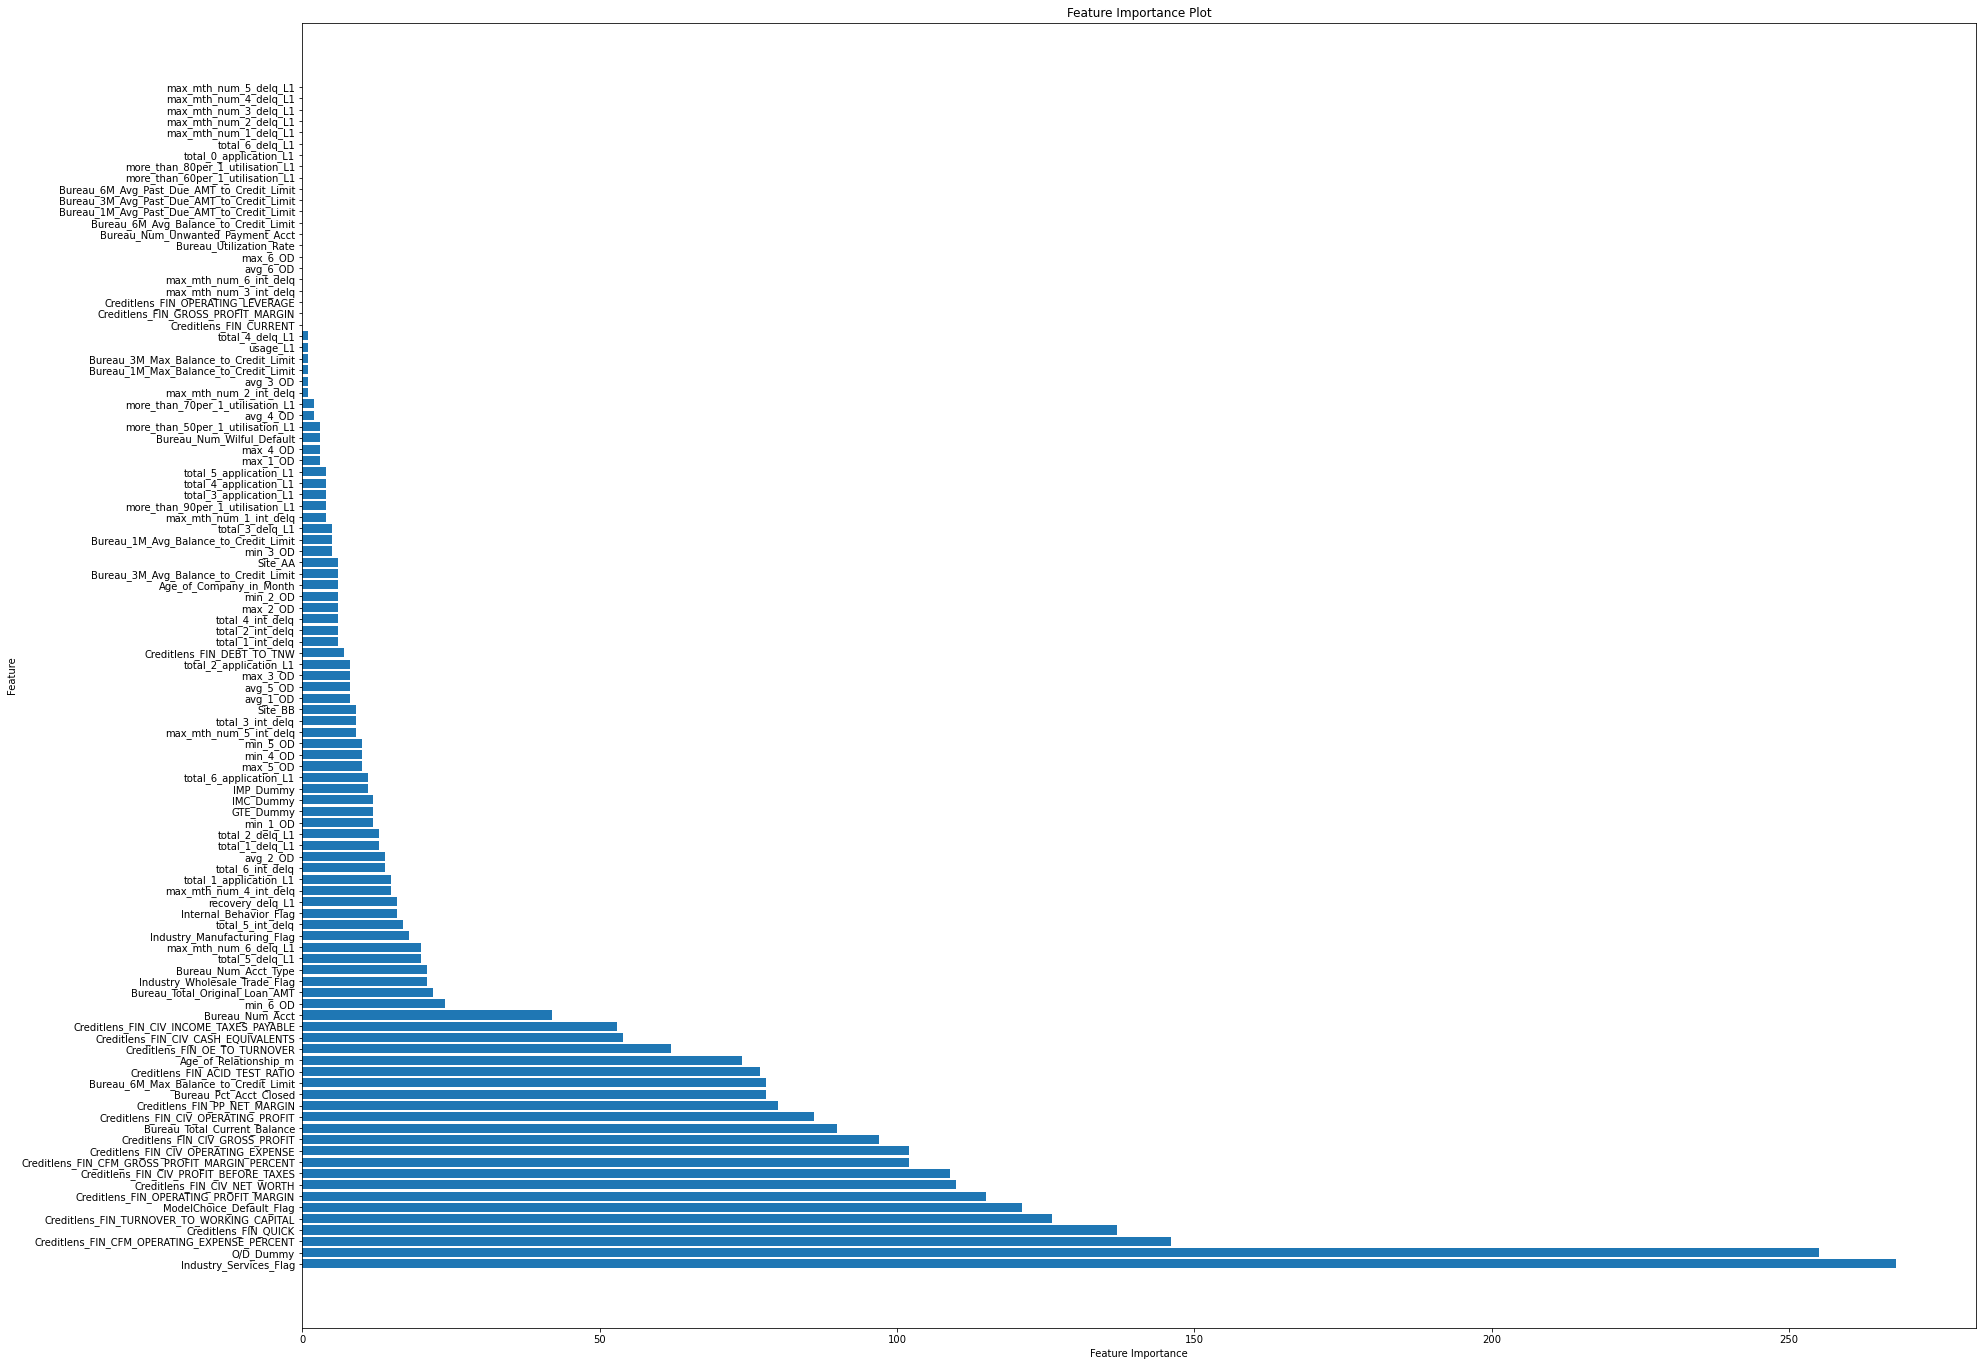

In [25]:
def draw_feature_importance(model, df):
    # 获取特征重要性
    feature_importance = model.feature_importances_

    # 获取特征名称
    feature_names = df.columns

    # 将特征重要性与特征名称组合成元组列表，并按照重要性排序
    sorted_feature_importance = sorted(zip(feature_names, feature_importance), key=lambda x: x[1], reverse=True)

    # 分离特征名称和重要性
    sorted_feature_names, sorted_feature_importance = zip(*sorted_feature_importance)

    # 绘制特征重要性图
    plt.figure(figsize=(30, 24))
    plt.barh(range(len(sorted_feature_importance)), sorted_feature_importance, align='center')
    plt.yticks(range(len(sorted_feature_importance)), sorted_feature_names)
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature')
    plt.title('Feature Importance Plot')
    plt.show()
    
draw_feature_importance(pipe_lgb.named_steps['clf'], df_test_encoder)

# 3. My Model Structure

**Vertically, I train a strong machine learning model (such as lgb, catboost, xgboost) for each type of module feature, and horizontally, I train a logistic regression model for an Integrated segment.**

In [26]:
df_dic

,Fields,Type,Label (where available),Description,Remark
0,ModelChoice_Default_Flag,Target variable,Default Flag,Covers: (i) Master Default List (ii) CRR 9/10 ...,NaN
1,Site,Segment,NaN,A site refers to a market in which the bank op...,NaN
2,Age_of_Company_in_Month,Segment,NaN,Age of Company in Month,NaN
3,Industry_Manufacturing_Flag,Segment,NaN,Industry Manufacturing Flag,NaN
4,Industry_Wholesale_Trade_Flag,Segment,NaN,Industry Wholesale Trade Flag,NaN
...,...,...,...,...,...
100,max_mth_num_3_delq_L1,Bureau,NaN,the longest bureau delinquency cycle in the pa...,This field is only available for BB.
101,max_mth_num_4_delq_L1,Bureau,NaN,the longest bureau delinquency cycle in the pa...,This field is only available for BB.
102,max_mth_num_5_delq_L1,Bureau,NaN,the longest bureau delinquency cycle in the pa...,This field is only available for BB.
103,max_mth_num_6_delq_L1,Bureau,NaN,the longest bureau delinquency cycle in the pa...,This field is only available for BB.


In [36]:
import pandas as pd

def create_integrated_segment(df):
    # 根据条件将 Age_of_Company_in_Month 划分为 0/1 类别
    df['Age_Category'] = (df['Age_of_Company_in_Month'] > 219).astype(int)

    # 创建 Integrated_segments 列
    df['Integrated_segments'] = df['Site'] + '_' + df['Age_Category'].astype(str) + '_' + \
                                df['Industry_Manufacturing_Flag'].astype(str) + '_' + \
                                df['Industry_Wholesale_Trade_Flag'].astype(str) + '_' + \
                                df['Industry_Services_Flag'].astype(str)
    return df

# Create a new Integrated Segment which combine Age_of_Company_in_Month, Industry_Manufacturing_Flag, Industry_Wholesale_Trade_Flag, Industry_Services_Flag
df_train_IS = create_integrated_segment(df_train.copy())
df_test_IS = create_integrated_segment(df_test.copy())

In [31]:
import numpy as np
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
import optuna
from sklearn.metrics import roc_auc_score

class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self, df_dict):
        self.df_dict = df_dict

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        module_features = {}
        for module_prefix in ['Internal Behavior', 'Financial', 'Bureau']:
            module_features[module_prefix] = self.extract_features(module_prefix)
        return module_features

    def extract_features(self, module_prefix):
        features = []
        for index, row in self.df_dict.iterrows():
            if row['Type'].startswith(module_prefix):
                features.extend(row['Fields'].split(','))
        return features

# Assuming df_dict is your DataFrame containing the data with 'Type' and 'Fields' columns
feature_extractor = FeatureExtractor(df_dic)
module_features = feature_extractor.transform(df_dic)

In [107]:
import numpy as np
import pandas as pd
import lightgbm as lgb
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score

class StackedModel:
    def __init__(self, module_features, lgb_params=None, logreg_params=None):
        self.module_features = module_features
        self.lgb_params = lgb_params
        self.logreg_params = logreg_params
        self.lgb_models = {}
        self.logreg_models = {}

    def fit(self, df_train):
        df_train.reset_index(drop=True, inplace=True)
        # Train LightGBM classifiers for each module
        for module_prefix, features in self.module_features.items():
            self.lgb_models[module_prefix] = lgb.LGBMClassifier(**self.lgb_params)
            self.lgb_models[module_prefix].fit(df_train[features], df_train['ModelChoice_Default_Flag'])

        # Predict probabilities for each module and stack the results
        module_probabilities_train = []
        for module_prefix, lgb_model in self.lgb_models.items():
            probabilities = lgb_model.predict_proba(df_train[self.module_features[module_prefix]])[:, 1]
            module_probabilities_train.append(probabilities)

        data_log_train = np.vstack(module_probabilities_train).T

        # Split data_log into segments based on the 'Integrated_segments' column
        segments = df_train['Integrated_segments'].unique()
        segment_data_train = {segment: [] for segment in segments}
        for segment in segments:
            segment_indices = df_train[df_train['Integrated_segments'] == segment].index
            segment_data_train[segment] = data_log_train[segment_indices]

        # Train logistic regression models for each segment
        # Calculate average AUC for evaluation
        auc_scores = []
        for segment, data_segment in segment_data_train.items():
            self.logreg_models[segment] = LogisticRegression(**self.logreg_params)
            self.logreg_models[segment].fit(data_segment, df_train.loc[df_train['Integrated_segments'] == segment, 'ModelChoice_Default_Flag'])

    def predict(self, df_test):
        df_test.reset_index(drop=True, inplace=True)
        # Predict probabilities for each module in the test set
        module_probabilities_test = {}
        for module_prefix, lgb_model in self.lgb_models.items():
            module_probabilities_test[module_prefix] = lgb_model.predict_proba(df_test[self.module_features[module_prefix]])[:, 1]

        data_log_test = np.vstack(list(module_probabilities_test.values())).T

        # Split data_log into segments based on the 'Integrated_segments' column in the test set
        test_segments = df_test['Integrated_segments'].unique()
        segment_data_test = {segment: [] for segment in test_segments}
        for segment in test_segments:
            segment_indices = df_test[df_test['Integrated_segments'] == segment].index
            segment_data_test[segment] = data_log_test[segment_indices]

        predictions = []
        true_labels = []
        probabilities = []

        for segment, data_segment in segment_data_test.items():
            segment_probabilities = self.logreg_models[segment].predict_proba(data_segment)[:, 1]
            segment_predictions = (segment_probabilities > 0.5).astype(int)
            # Append predictions and true labels for evaluation
            predictions.extend(segment_predictions)
            probabilities.extend(segment_probabilities)
            true_labels.extend(df_test.loc[df_test['Integrated_segments'] == segment, 'ModelChoice_Default_Flag'])

        return predictions, true_labels, probabilities

    def evaluate(self, true_labels, predictions, probabilities):
        auc_score = roc_auc_score(true_labels, probabilities)
        accuracy = accuracy_score(true_labels, predictions)
        recall = recall_score(true_labels, predictions)
        precision = precision_score(true_labels, predictions)
        f1 = f1_score(true_labels, predictions)

        return auc_score, accuracy, recall, precision, f1

lgb_params = {'random_state':1, 'n_estimators':40, 'n_jobs':6}
logreg_params = {'penalty':'l2', 'C':1, 'solver':'liblinear', 'multi_class':'ovr'}
# 创建 StackedModel 实例并进行训练和预测
stacked_model = StackedModel(module_features, lgb_params=lgb_params, logreg_params=logreg_params)
stacked_model.fit(df_train_IS.copy())
predictions, true_labels, probabilities = stacked_model.predict(df_test_IS.copy())
auc_score, accuracy, recall, precision, f1 = stacked_model.evaluate(true_labels, predictions, probabilities)

print("AUC:", auc_score)
print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

AUC: 0.716891077882503
Accuracy: 0.9039746746394653
Recall: 0.2815533980582524
Precision: 0.12719298245614036
F1 Score: 0.17522658610271905


In [130]:
import numpy as np
import pandas as pd
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier

class StackedModel:
    def __init__(self, module_features, model_params=None, logreg_params=None, model_class=None):
        self.module_features = module_features
        self.model_params = model_params
        self.logreg_params = logreg_params
        self.models = {}
        self.logreg_models = {}
        self.model_class = model_class

    def fit(self, df_train):
        df_train.reset_index(drop=True, inplace=True)
        # Train classifiers for each module
        for module_prefix, features in self.module_features.items():
            self.models[module_prefix] = self.model_class(**self.model_params)
            self.models[module_prefix].fit(df_train[features], df_train['ModelChoice_Default_Flag'])

        # Predict probabilities for each module and stack the results
        module_probabilities_train = []
        for module_prefix, model in self.models.items():
            probabilities = model.predict_proba(df_train[self.module_features[module_prefix]])[:, 1]
            module_probabilities_train.append(probabilities)

        data_log_train = np.vstack(module_probabilities_train).T

        # Split data_log into segments based on the 'Integrated_segments' column
        segments = df_train['Integrated_segments'].unique()
        segment_data_train = {segment: [] for segment in segments}
        for segment in segments:
            segment_indices = df_train[df_train['Integrated_segments'] == segment].index
            segment_data_train[segment] = data_log_train[segment_indices]

        # Train logistic regression models for each segment
        # Calculate average AUC for evaluation
        auc_scores = []
        for segment, data_segment in segment_data_train.items():
            self.logreg_models[segment] = LogisticRegression(**self.logreg_params)
            self.logreg_models[segment].fit(data_segment, df_train.loc[df_train['Integrated_segments'] == segment, 'ModelChoice_Default_Flag'])
        
    def predict(self, df_test):
        df_test.reset_index(drop=True, inplace=True)
        # Predict probabilities for each module in the test set
        module_probabilities_test = {}
        for module_prefix, model in self.models.items():
            module_probabilities_test[module_prefix] = model.predict_proba(df_test[self.module_features[module_prefix]])[:, 1]

        data_log_test = np.vstack(list(module_probabilities_test.values())).T

        # Split data_log into segments based on the 'Integrated_segments' column in the test set
        test_segments = df_test['Integrated_segments'].unique()
        segment_data_test = {segment: [] for segment in test_segments}
        for segment in test_segments:
            segment_indices = df_test[df_test['Integrated_segments'] == segment].index
            segment_data_test[segment] = data_log_test[segment_indices]

        predictions = []
        true_labels = []
        probabilities = []

        for segment, data_segment in segment_data_test.items():
            segment_probabilities = self.logreg_models[segment].predict_proba(data_segment)[:, 1]
            segment_predictions = (segment_probabilities > 0.5).astype(int)
            # Append predictions and true labels for evaluation
            predictions.extend(segment_predictions)
            probabilities.extend(segment_probabilities)
            true_labels.extend(df_test.loc[df_test['Integrated_segments'] == segment, 'ModelChoice_Default_Flag'])

        return predictions, true_labels, probabilities

    def evaluate(self, true_labels, predictions, probabilities):
        auc_score = roc_auc_score(true_labels, probabilities)
        accuracy = accuracy_score(true_labels, predictions)
        recall = recall_score(true_labels, predictions)
        precision = precision_score(true_labels, predictions)
        f1 = f1_score(true_labels, predictions)

        return auc_score, accuracy, recall, precision, f1

def test_StackModel(lgb_params=None, logreg_params=None, model_class=lgb.LGBMClassifier):
    # 创建 StackedModel 实例并进行训练和预测
    stacked_model = StackedModel(module_features, model_params=model_params, logreg_params=logreg_params, model_class=model_class)
    stacked_model.fit(df_train_IS.copy())
    predictions, true_labels, probabilities = stacked_model.predict(df_test_IS.copy())
    auc_score, accuracy, recall, precision, f1 = stacked_model.evaluate(true_labels, predictions, probabilities)
    draw_roc(true_labels, probabilities)
    print("AUC:", auc_score)
    print("Accuracy:", accuracy)
    print("Recall:", recall)
    print("Precision:", precision)
    print("F1 Score:", f1)

## 3.1 LGB+LogisticRegression

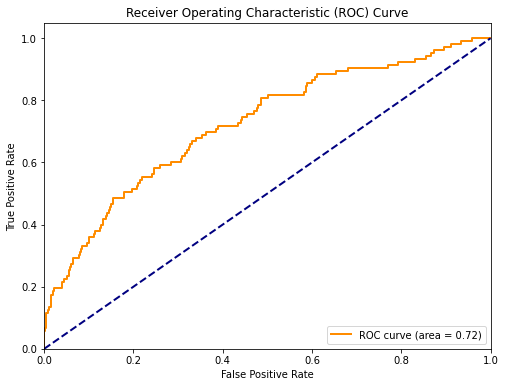

AUC: 0.721710013464673
Accuracy: 0.8895532887794583
Recall: 0.3300970873786408
Precision: 0.12186379928315412
F1 Score: 0.17801047120418848


In [159]:
test_StackModel({'num_leaves': 83, 'learning_rate': 0.09901417225332643, 'max_depth': 9, 'n_estimators': 67}, {'penalty':'l2', 'C':0.2, 'solver':'liblinear', 'multi_class':'ovr'}, lgb.LGBMClassifier)

## 3.2 XGB+LogisticRegression

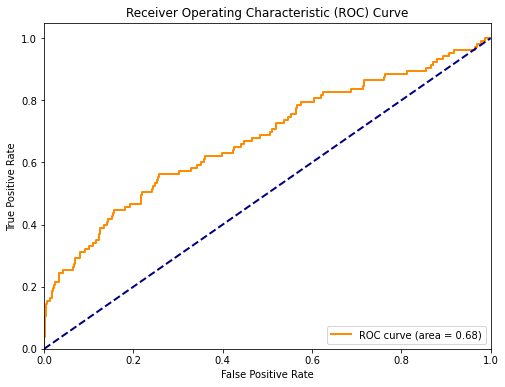

AUC: 0.6752037417617461
Accuracy: 0.911712979247274
Recall: 0.2524271844660194
Precision: 0.13
F1 Score: 0.1716171617161716


In [134]:
import xgboost as xgb
from catboost import CatBoostClassifier
test_StackModel({'objective': 'binary:logistic','n_estimators': 70, 'eval_metric': 'auc', 'random_state': 42}, {'penalty':'l2', 'C':0.2, 'solver':'liblinear', 'multi_class':'ovr'}, xgb.XGBClassifier)

## 3.2 CatBoost+LogisticRegression

Learning rate set to 0.5
0:	learn: 0.6643713	total: 6.54ms	remaining: 320ms
1:	learn: 0.6441720	total: 12.7ms	remaining: 305ms
2:	learn: 0.6288288	total: 19.5ms	remaining: 305ms
3:	learn: 0.6157697	total: 26.1ms	remaining: 300ms
4:	learn: 0.6083501	total: 31.9ms	remaining: 287ms
5:	learn: 0.5956579	total: 38.7ms	remaining: 283ms
6:	learn: 0.5883199	total: 46ms	remaining: 283ms
7:	learn: 0.5836813	total: 53.2ms	remaining: 279ms
8:	learn: 0.5780963	total: 60.5ms	remaining: 276ms
9:	learn: 0.5721703	total: 67.7ms	remaining: 271ms
10:	learn: 0.5669766	total: 74.8ms	remaining: 265ms
11:	learn: 0.5609095	total: 82.2ms	remaining: 260ms
12:	learn: 0.5569972	total: 90ms	remaining: 256ms
13:	learn: 0.5524629	total: 97.5ms	remaining: 251ms
14:	learn: 0.5502750	total: 106ms	remaining: 247ms
15:	learn: 0.5399983	total: 112ms	remaining: 239ms
16:	learn: 0.5344995	total: 119ms	remaining: 230ms
17:	learn: 0.5343204	total: 124ms	remaining: 221ms
18:	learn: 0.5297086	total: 131ms	remaining: 214ms
19:	le

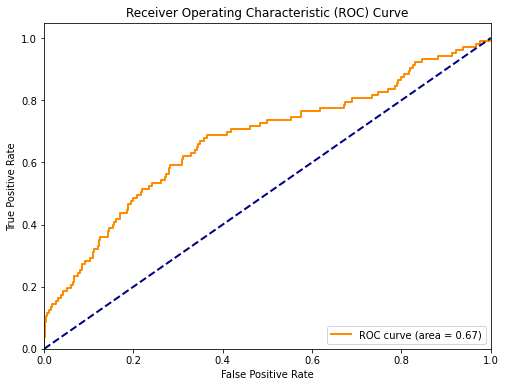

AUC: 0.6722734037275885
Accuracy: 0.889905029897995
Recall: 0.27184466019417475
Precision: 0.10526315789473684
F1 Score: 0.15176151761517614


In [157]:
test_StackModel({'eval_metric': 'AUC', 'random_state': 42, 'n_estimators': 100}, {'penalty':'l2', 'C':0.2, 'solver':'liblinear', 'multi_class':'ovr'}, CatBoostClassifier)

In [162]:
import optuna

def objective(trial):
    # Define the search space for LGBM parameters
    lgb_params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'num_leaves': trial.suggest_int('num_leaves', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.2),
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'n_estimators': trial.suggest_int('n_estimators', 10, 80),
        'n_jobs': 6
    }
    
    # Define the search space for Logistic Regression parameters
    logreg_params = {
        'penalty': 'l2',
        'C': 0.2,
        'solver': 'liblinear',
        'multi_class': 'ovr'
    }
    
    # Perform five-fold cross-validation
    kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
    avg_auc_scores = []
    for train_index, val_index in kf.split(df_train_IS, df_train_IS['ModelChoice_Default_Flag']):
        train_data, val_data = df_train_IS.iloc[train_index].copy(), df_train_IS.iloc[val_index].copy()
        
        # Train and evaluate the StackedModel with current parameters
        stacked_model = StackedModel(module_features, model_params=lgb_params, logreg_params=logreg_params, model_class=lgb.LGBMClassifier)
        stacked_model.fit(train_data)
        
        # Predict on validation set
        predictions, true_labels, probabilities = stacked_model.predict(val_data)
        avg_auc_score = roc_auc_score(true_labels, probabilities)
        avg_auc_scores.append(avg_auc_score)
    
    return np.mean(avg_auc_scores)

# Set up Optuna study
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30)

# Get the best parameters
best_lgb_params = study.best_params
print("Best LGBM parameters:", best_lgb_params)

[I 2024-04-18 19:50:18,043] A new study created in memory with name: no-name-695f970d-73d3-4fa8-a9df-fd547c34512e
C:\Users\11642\AppData\Local\Temp\ipykernel_24792\1908137559.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.2),
[I 2024-04-18 19:50:20,392] Trial 0 finished with value: 0.6881715783334379 and parameters: {'num_leaves': 30, 'learning_rate': 0.001485601313425397, 'max_depth': 10, 'n_estimators': 34}. Best is trial 0 with value: 0.6881715783334379.
C:\Users\11642\AppData\Local\Temp\ipykernel_24792\1908137559.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.sugges

C:\Users\11642\AppData\Local\Temp\ipykernel_24792\1908137559.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.2),
[I 2024-04-18 19:51:00,702] Trial 14 finished with value: 0.98771985328993 and parameters: {'num_leaves': 99, 'learning_rate': 0.04951798503265168, 'max_depth': 8, 'n_estimators': 64}. Best is trial 14 with value: 0.98771985328993.
C:\Users\11642\AppData\Local\Temp\ipykernel_24792\1908137559.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.2),
[I 2024-04-18 19:51:04,431] Trial 15 finished with value: 0.9627739343479165

[I 2024-04-18 19:51:44,199] Trial 28 finished with value: 0.8193137486292172 and parameters: {'num_leaves': 59, 'learning_rate': 0.023966338366003013, 'max_depth': 6, 'n_estimators': 26}. Best is trial 23 with value: 0.991115269547775.
C:\Users\11642\AppData\Local\Temp\ipykernel_24792\1908137559.py:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 1e-4, 0.2),
[I 2024-04-18 19:51:46,334] Trial 29 finished with value: 0.950289648781095 and parameters: {'num_leaves': 25, 'learning_rate': 0.11076598375332018, 'max_depth': 6, 'n_estimators': 32}. Best is trial 23 with value: 0.991115269547775.


Best LGBM parameters: {'num_leaves': 87, 'learning_rate': 0.09591173254922748, 'max_depth': 7, 'n_estimators': 63}


In [164]:
# Define the search space for Logistic Regression parameters
best_logreg_params = {
    'penalty': 'l2',
    'C': 0.2,
    'solver': 'liblinear',
    'multi_class': 'ovr'
}

# Train StackedModel with best parameters on all training data
stacked_model = StackedModel(module_features, model_params=best_lgb_params, logreg_params=best_logreg_params, model_class=lgb.LGBMClassifier)
stacked_model.fit(df_train_IS)

# Predict on test set using final model
predictions, true_labels, probabilities = stacked_model.predict(df_test_IS)

# Evaluate predictions
auc_score, accuracy, recall, precision, f1 = stacked_model.evaluate(true_labels, predictions, probabilities)

print("Final AUC:", auc_score)
print("Final Accuracy:", accuracy)
print("Final Recall:", recall)
print("Final Precision:", precision)
print("Final F1 Score:", f1)

Final AUC: 0.7136099496846432
Final Accuracy: 0.9008090045726346
Final Recall: 0.3106796116504854
Final Precision: 0.13168724279835392
Final F1 Score: 0.18497109826589597


In [37]:
X_train_encoder.shape

(21908, 105)

# 4. Use AutoEncoder to get more features

Epoch [1/500], Train Loss: 0.9115, Val Loss: 40.1119
Epoch [2/500], Train Loss: 0.8306, Val Loss: 40.0551
Epoch [3/500], Train Loss: 0.8080, Val Loss: 40.0143
Epoch [4/500], Train Loss: 0.7985, Val Loss: 40.0235
Epoch [5/500], Train Loss: 0.8020, Val Loss: 39.9006
Epoch [6/500], Train Loss: 0.7758, Val Loss: 39.9648
Epoch [7/500], Train Loss: 0.7760, Val Loss: 39.8074
Epoch [8/500], Train Loss: 0.7568, Val Loss: 39.7176
Epoch [9/500], Train Loss: 0.7515, Val Loss: 39.7113
Epoch [10/500], Train Loss: 0.8473, Val Loss: 39.9072
Epoch [11/500], Train Loss: 0.7324, Val Loss: 39.8448
Epoch [12/500], Train Loss: 0.6414, Val Loss: 39.7883
Epoch [13/500], Train Loss: 0.7368, Val Loss: 39.5693
Epoch [14/500], Train Loss: 0.6801, Val Loss: 39.5419
Epoch [15/500], Train Loss: 0.4533, Val Loss: 39.4008
Epoch [16/500], Train Loss: 0.7177, Val Loss: 39.1992
Epoch [17/500], Train Loss: 0.8628, Val Loss: 39.0531
Epoch [18/500], Train Loss: 0.7453, Val Loss: 38.7150
Epoch [19/500], Train Loss: 0.5517, V

Epoch [152/500], Train Loss: 0.7431, Val Loss: 20.4426
Epoch [153/500], Train Loss: 0.5010, Val Loss: 20.2870
Epoch [154/500], Train Loss: 0.6826, Val Loss: 19.3563
Epoch [155/500], Train Loss: 0.4612, Val Loss: 19.8757
Epoch [156/500], Train Loss: 0.5029, Val Loss: 18.7878
Epoch [157/500], Train Loss: 0.7053, Val Loss: 18.1404
Epoch [158/500], Train Loss: 2.2446, Val Loss: 18.4250
Epoch [159/500], Train Loss: 0.5206, Val Loss: 18.3818
Epoch [160/500], Train Loss: 0.6609, Val Loss: 18.8083
Epoch [161/500], Train Loss: 0.7367, Val Loss: 19.1337
Epoch [162/500], Train Loss: 0.4776, Val Loss: 18.8393
Epoch [163/500], Train Loss: 0.6285, Val Loss: 19.0563
Epoch [164/500], Train Loss: 0.7205, Val Loss: 28.4827
Epoch [165/500], Train Loss: 0.4234, Val Loss: 26.9574
Epoch [166/500], Train Loss: 0.4943, Val Loss: 24.3963
Epoch [167/500], Train Loss: 0.6455, Val Loss: 24.1691
Epoch [168/500], Train Loss: 0.4233, Val Loss: 24.1626
Epoch [169/500], Train Loss: 0.7096, Val Loss: 24.7157
Epoch [170

Epoch [301/500], Train Loss: 0.7234, Val Loss: 33.2437
Epoch [302/500], Train Loss: 0.5098, Val Loss: 33.3247
Epoch [303/500], Train Loss: 0.6757, Val Loss: 34.9125
Epoch [304/500], Train Loss: 0.6244, Val Loss: 35.1958
Epoch [305/500], Train Loss: 0.7018, Val Loss: 35.5773
Epoch [306/500], Train Loss: 0.5059, Val Loss: 32.6541
Epoch [307/500], Train Loss: 0.6865, Val Loss: 34.6111
Epoch [308/500], Train Loss: 0.4447, Val Loss: 32.1922
Epoch [309/500], Train Loss: 0.7113, Val Loss: 33.3598
Epoch [310/500], Train Loss: 0.7379, Val Loss: 32.5023
Epoch [311/500], Train Loss: 0.6769, Val Loss: 32.4172
Epoch [312/500], Train Loss: 0.6943, Val Loss: 30.6838
Epoch [313/500], Train Loss: 0.6633, Val Loss: 31.9650
Epoch [314/500], Train Loss: 0.4964, Val Loss: 29.0433
Epoch [315/500], Train Loss: 0.5856, Val Loss: 28.8363
Epoch [316/500], Train Loss: 6.8463, Val Loss: 26.7135
Epoch [317/500], Train Loss: 0.7712, Val Loss: 27.1384
Epoch [318/500], Train Loss: 0.6927, Val Loss: 28.0813
Epoch [319

Epoch [450/500], Train Loss: 0.6031, Val Loss: 38.1424
Epoch [451/500], Train Loss: 0.7284, Val Loss: 37.9094
Epoch [452/500], Train Loss: 0.3913, Val Loss: 37.1816
Epoch [453/500], Train Loss: 1.1191, Val Loss: 36.8671
Epoch [454/500], Train Loss: 0.5388, Val Loss: 36.2423
Epoch [455/500], Train Loss: 0.4022, Val Loss: 36.1888
Epoch [456/500], Train Loss: 0.7100, Val Loss: 36.1529
Epoch [457/500], Train Loss: 0.3988, Val Loss: 35.5643
Epoch [458/500], Train Loss: 0.4593, Val Loss: 35.5466
Epoch [459/500], Train Loss: 0.6266, Val Loss: 37.8548
Epoch [460/500], Train Loss: 0.4113, Val Loss: 38.0194
Epoch [461/500], Train Loss: 0.5800, Val Loss: 37.6398
Epoch [462/500], Train Loss: 0.6966, Val Loss: 35.9217
Epoch [463/500], Train Loss: 0.5829, Val Loss: 36.1781
Epoch [464/500], Train Loss: 0.3791, Val Loss: 36.1910
Epoch [465/500], Train Loss: 0.3909, Val Loss: 34.9988
Epoch [466/500], Train Loss: 0.6607, Val Loss: 35.0915
Epoch [467/500], Train Loss: 0.4054, Val Loss: 34.4349
Epoch [468

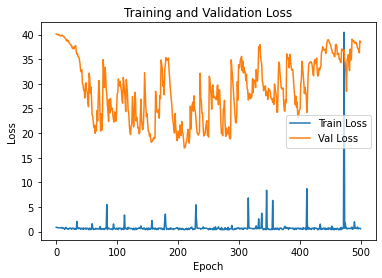

In [44]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def train_autoencoder(X, y, encoding_dim=32, num_epochs=100, batch_size=64, learning_rate=1e-3, test_size=0.2, dropout_rate=0.5):
    """
    训练自动编码器进行特征扩充

    参数:
        X (numpy.ndarray): 输入数据，特征维度接近102
        y (numpy.ndarray): 标签数据
        encoding_dim (int): 编码器的隐藏层维度，默认为32
        num_epochs (int): 训练的迭代次数，默认为100
        batch_size (int): 每个批次的样本数，默认为64
        learning_rate (float): 学习率，默认为1e-3
        test_size (float): 验证集比例，默认为0.2
        dropout_rate (float): Dropout 层的丢弃率，默认为0.5

    返回:
        nn.Module: 训练完成的自动编码器模型
    """
    # 划分训练集和验证集
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=test_size, random_state=42)

    # 标准化数据
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)

    # 提取标签为0的样本
    X_label0_train = X_train_scaled[y_train == 0]
    X_label0_val = X_val_scaled[y_val == 0]

    # 转换为 PyTorch Tensor
    X_label0_train_tensor = torch.tensor(X_label0_train, dtype=torch.float32)
    X_label0_val_tensor = torch.tensor(X_label0_val, dtype=torch.float32)

    # 定义自动编码器模型
    class Autoencoder(nn.Module):
        def __init__(self, input_dim, encoding_dim, dropout_rate):
            super(Autoencoder, self).__init__()
            self.encoder = nn.Sequential(
                nn.Linear(input_dim, 128),
                nn.ReLU(True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, 64),
                nn.ReLU(True),
                nn.Dropout(dropout_rate),
                nn.Linear(64, encoding_dim),
            )
            self.decoder = nn.Sequential(
                nn.Linear(encoding_dim, 64),
                nn.ReLU(True),
                nn.Dropout(dropout_rate),
                nn.Linear(64, 128),
                nn.ReLU(True),
                nn.Dropout(dropout_rate),
                nn.Linear(128, input_dim),
            )

        def forward(self, x):
            x = self.encoder(x)
            x = self.decoder(x)
            return x

    # 初始化模型
    input_dim = X_label0_train.shape[1]
    model = Autoencoder(input_dim, encoding_dim, dropout_rate)

    # 定义损失函数和优化器
    criterion = nn.MSELoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # 将数据转换为 DataLoader
    train_dataset = TensorDataset(X_label0_train_tensor)
    train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
    val_dataset = TensorDataset(X_label0_val_tensor)
    val_loader = DataLoader(dataset=val_dataset, batch_size=batch_size)

    # 初始化最低验证集损失和最佳模型参数
    best_val_loss = float('inf')
    best_model_params = None

    # 训练过程中记录loss
    train_losses = []
    val_losses = []

    # 训练模型
    for epoch in range(num_epochs):
        # 训练阶段
        model.train()
        total_train_loss = 0
        for batch in train_loader:
            optimizer.zero_grad()
            reconstructed = model(batch[0])
            loss = criterion(reconstructed, batch[0])
            loss.backward()
            optimizer.step()
            total_train_loss += loss.item()
        train_loss = total_train_loss / len(train_loader)
        train_losses.append(train_loss)

        # 验证阶段
        model.eval()
        total_val_loss = 0
        with torch.no_grad():
            for batch in val_loader:
                reconstructed = model(batch[0])
                loss = criterion(reconstructed, batch[0])
                total_val_loss += loss.item()
        val_loss = total_val_loss / len(val_loader)
        val_losses.append(val_loss)

        print(f'Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_loss:.4f}, Val Loss: {val_loss:.4f}')

        # 如果验证集损失更低，则保存模型参数
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_params = model.state_dict()

    # 加载最佳模型参数
    model.load_state_dict(best_model_params)

    # 绘制loss曲线
    plt.plot(train_losses, label='Train Loss')
    plt.plot(val_losses, label='Val Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.title('Training and Validation Loss')
    plt.show()

    return model

# 调用函数进行训练
model = train_autoencoder(X_train_encoder, y_train, num_epochs=500, encoding_dim=32, dropout_rate=0.5, learning_rate=1e-3)

## 4.1 Drop 10% useless features by lgb feature_importance and train the autoencoder again

In [49]:
pipe_lgb.named_steps['clf'].feature_importances_

array([121,  77, 102, 146,  54,  97,  53, 102,  86, 109,   0,   0,  62,
         0, 115,  80, 137, 126, 110,   7,  16,   4,   1,   0,  15,   9,
         0,   6,   6,   9,   6,  17,  14,   8,  14,   1,   2,   8,   0,
         3,   6,   8,   3,  10,   0,  12,   6,   5,  10,  10,  24,  12,
        12,  11, 255,   6,  18,  21, 268,  74,  42,  21,  78,  90,  22,
         0,   3,   0,   5,   6,   0,   0,   0,   0,   1,   1,  78,   1,
         3,   0,   2,   0,   4,   0,  15,   8,   4,   4,   4,  11,  13,
        13,   5,   1,  20,   0,   0,   0,   0,   0,   0,  20,  16,   6,
         9])

In [58]:
def drop_least_important_features(X, lgb_model, drop_percent=0.1):
    """
    删除 LightGBM 模型中 feature_importance 后 10% 的特征

    参数:
        X (numpy.ndarray): 输入特征数据
        lgb_model (lightgbm.Booster): 已经训练好的 LightGBM 模型
        drop_percent (float): 要删除的特征比例，默认为 0.1

    返回:
        numpy.ndarray: 删除特征后的特征数据
    """
    # 获取特征重要性
    feature_importance = lgb_model.feature_importances_

    # 根据特征重要性排序
    sorted_indices = np.argsort(feature_importance)
    
    # 计算要删除的特征数量
    num_features_to_drop = int(len(X[0]) * drop_percent)

    # 删除特征
    X_drop = np.delete(X, sorted_indices[:num_features_to_drop], axis=1)

    return X_drop

# 使用示例
X_train_encoder_drop = drop_least_important_features(X_train_encoder, pipe_lgb.named_steps['clf'])
X_test_encoder_drop = drop_least_important_features(X_test_encoder, pipe_lgb.named_steps['clf'])

Epoch [1/500], Train Loss: 0.9074, Val Loss: 44.3028
Epoch [2/500], Train Loss: 0.8422, Val Loss: 44.3667
Epoch [3/500], Train Loss: 0.8351, Val Loss: 44.3445
Epoch [4/500], Train Loss: 0.8059, Val Loss: 44.0887
Epoch [5/500], Train Loss: 0.7811, Val Loss: 44.1544
Epoch [6/500], Train Loss: 0.8955, Val Loss: 44.3326
Epoch [7/500], Train Loss: 0.7815, Val Loss: 44.2895
Epoch [8/500], Train Loss: 0.7727, Val Loss: 44.2389
Epoch [9/500], Train Loss: 0.7497, Val Loss: 44.2172
Epoch [10/500], Train Loss: 0.7861, Val Loss: 44.0633
Epoch [11/500], Train Loss: 0.7462, Val Loss: 44.1407
Epoch [12/500], Train Loss: 0.7275, Val Loss: 44.2373
Epoch [13/500], Train Loss: 0.6416, Val Loss: 44.1266
Epoch [14/500], Train Loss: 0.7373, Val Loss: 44.2273
Epoch [15/500], Train Loss: 0.7254, Val Loss: 44.2455
Epoch [16/500], Train Loss: 0.5603, Val Loss: 44.2321
Epoch [17/500], Train Loss: 0.6849, Val Loss: 44.2559
Epoch [18/500], Train Loss: 0.5208, Val Loss: 44.2193
Epoch [19/500], Train Loss: 0.7400, V

Epoch [152/500], Train Loss: 0.5596, Val Loss: 23.9866
Epoch [153/500], Train Loss: 0.5086, Val Loss: 30.9247
Epoch [154/500], Train Loss: 1.9885, Val Loss: 28.4226
Epoch [155/500], Train Loss: 0.3817, Val Loss: 25.6082
Epoch [156/500], Train Loss: 0.5883, Val Loss: 23.7913
Epoch [157/500], Train Loss: 0.6247, Val Loss: 23.6236
Epoch [158/500], Train Loss: 0.6491, Val Loss: 25.6408
Epoch [159/500], Train Loss: 0.4082, Val Loss: 26.5124
Epoch [160/500], Train Loss: 0.5040, Val Loss: 28.7910
Epoch [161/500], Train Loss: 0.5416, Val Loss: 27.2335
Epoch [162/500], Train Loss: 0.7457, Val Loss: 27.0604
Epoch [163/500], Train Loss: 0.5704, Val Loss: 30.2677
Epoch [164/500], Train Loss: 0.6021, Val Loss: 28.2747
Epoch [165/500], Train Loss: 0.5092, Val Loss: 23.4248
Epoch [166/500], Train Loss: 0.4146, Val Loss: 29.1758
Epoch [167/500], Train Loss: 0.4929, Val Loss: 37.4333
Epoch [168/500], Train Loss: 1.4873, Val Loss: 36.1377
Epoch [169/500], Train Loss: 0.6539, Val Loss: 35.5960
Epoch [170

Epoch [301/500], Train Loss: 0.4411, Val Loss: 32.8909
Epoch [302/500], Train Loss: 0.4900, Val Loss: 32.2232
Epoch [303/500], Train Loss: 0.3896, Val Loss: 27.6941
Epoch [304/500], Train Loss: 0.3824, Val Loss: 26.0665
Epoch [305/500], Train Loss: 1.6385, Val Loss: 33.5679
Epoch [306/500], Train Loss: 0.7213, Val Loss: 32.4435
Epoch [307/500], Train Loss: 0.6840, Val Loss: 30.7397
Epoch [308/500], Train Loss: 0.6821, Val Loss: 28.6604
Epoch [309/500], Train Loss: 0.5893, Val Loss: 30.1920
Epoch [310/500], Train Loss: 0.6862, Val Loss: 27.1062
Epoch [311/500], Train Loss: 0.4672, Val Loss: 26.6007
Epoch [312/500], Train Loss: 0.3964, Val Loss: 30.3885
Epoch [313/500], Train Loss: 0.4620, Val Loss: 30.6895
Epoch [314/500], Train Loss: 0.7251, Val Loss: 30.4198
Epoch [315/500], Train Loss: 0.6647, Val Loss: 31.3683
Epoch [316/500], Train Loss: 0.6987, Val Loss: 28.1416
Epoch [317/500], Train Loss: 0.6931, Val Loss: 24.5816
Epoch [318/500], Train Loss: 0.5309, Val Loss: 22.9472
Epoch [319

Epoch [450/500], Train Loss: 0.3667, Val Loss: 35.3163
Epoch [451/500], Train Loss: 0.5285, Val Loss: 39.2800
Epoch [452/500], Train Loss: 0.7030, Val Loss: 39.2102
Epoch [453/500], Train Loss: 0.6854, Val Loss: 37.7586
Epoch [454/500], Train Loss: 0.8479, Val Loss: 35.4112
Epoch [455/500], Train Loss: 0.5802, Val Loss: 35.7257
Epoch [456/500], Train Loss: 0.7292, Val Loss: 33.9721
Epoch [457/500], Train Loss: 0.6671, Val Loss: 33.9973
Epoch [458/500], Train Loss: 0.6885, Val Loss: 32.3143
Epoch [459/500], Train Loss: 0.6959, Val Loss: 30.4977
Epoch [460/500], Train Loss: 0.7081, Val Loss: 28.4095
Epoch [461/500], Train Loss: 0.6749, Val Loss: 26.1065
Epoch [462/500], Train Loss: 0.6969, Val Loss: 23.9950
Epoch [463/500], Train Loss: 0.7145, Val Loss: 27.9872
Epoch [464/500], Train Loss: 0.6385, Val Loss: 25.7320
Epoch [465/500], Train Loss: 0.8425, Val Loss: 24.8720
Epoch [466/500], Train Loss: 0.5980, Val Loss: 24.9612
Epoch [467/500], Train Loss: 0.7330, Val Loss: 22.8878
Epoch [468

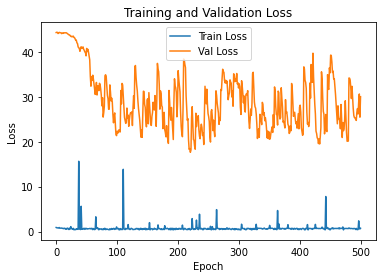

In [53]:
model_drop = train_autoencoder(X_train_encoder_drop, y_train, num_epochs=500, encoding_dim=32, dropout_rate=0.5, learning_rate=1e-3)

In [62]:
def generate_new_features(X, autoencoder_model, scaler):
    """
    使用训练好的自动编码器模型生成新的特征

    参数:
        X (numpy.ndarray): 输入特征数据
        autoencoder_model (nn.Module): 已经训练好的自动编码器模型
        scaler (StandardScaler): 标准化器

    返回:
        numpy.ndarray: 新的特征数据
    """
    # 标准化输入数据
    X_scaled = scaler.fit_transform(X)

    # 转换为 PyTorch Tensor
    X_tensor = torch.tensor(X_scaled, dtype=torch.float32)

    # 设置模型为评估模式
    autoencoder_model.eval()

    # 使用模型进行重构
    with torch.no_grad():
        reconstructed_features = autoencoder_model(X_tensor).numpy()

    # 计算重构误差
    new_features = X_scaled - reconstructed_features

    # 将新特征添加到原始特征中
    extended_features = np.hstack((X, new_features))

    return extended_features

# 使用示例
X_train_encoder_drop_extended = generate_new_features(X_train_encoder_drop, model_drop, StandardScaler())
X_test_encoder_drop_extended = generate_new_features(X_test_encoder_drop, model_drop, StandardScaler())

In [63]:
X_test_encoder_drop_extended.shape

(2843, 190)

Five-fold cross-validation AUC:  [0.99774056 0.99851987 0.9982291  0.99880113 0.99866066]
Average AUC:  0.9983902659287305
After training using the entire training set, the AUC on the test data set:  0.6869622989157396
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2740
           1       0.38      0.05      0.09       103

    accuracy                           0.96      2843
   macro avg       0.67      0.52      0.53      2843
weighted avg       0.94      0.96      0.95      2843

AUC: 0.6869622989157396
Accuracy: 0.9627154414351038
Recall: 0.04854368932038835
Precision: 0.38461538461538464
F1 Score: 0.08620689655172414


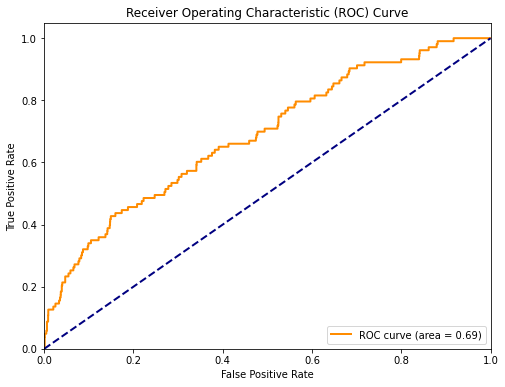

In [65]:
bench_mark(pipe_lgb, X_train_encoder_drop_extended, y_train, X_test_encoder_drop_extended, y_test)

## 4.2 PCA

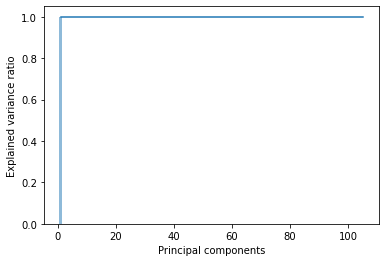

In [81]:
from sklearn.decomposition import PCA

def pca_analysis(X_train_std):
    pca = PCA()
    X_train_pca = pca.fit_transform(X_train_std)
    pca.explained_variance_ratio_
    plt.bar(range(1, X_train_std.shape[1]+1), pca.explained_variance_ratio_, alpha=0.5, align='center')
    plt.step(range(1, X_train_std.shape[1]+1), np.cumsum(pca.explained_variance_ratio_), where='mid')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')

    plt.show()
pca_analysis(X_train_encoder)